In [1]:
pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=e1b09830314cc5b80d6d165a625e967e6219cfa09c59f2df61cc0685417714bc
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arff

from IPython.display import display, HTML
from google.colab import drive


In [3]:
def load_arff_to_dataframe(file_path):
    try:
        with open(file_path, 'r') as f:
            data = arff.load(f)
            df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])
            return df
    except Exception as e:
        print("Error:", e)

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# file_path = '/content/drive/MyDrive/dataset_31_credit-g.arff'
# df = load_arff_to_dataframe(file_path)
# df.head(3)

file_path = '/content/drive/MyDrive/postCapitalTwo.csv'
df = pd.read_csv(file_path)
df.head(3).T

,0,1,2
checking_status,<0,0<=X<200,no checking
duration,6,48,12
credit_history,critical/other existing credit,existing paid,critical/other existing credit
purpose,radio/tv,radio/tv,education
credit_amount,1169,5951,2096
savings_status,no known savings,<100,<100
employment,>=7,1<=X<4,4<=X<7
installment_commitment,4,2,2
personal_status,male single,female div/dep/mar,male single
other_parties,none,none,none


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   int64  
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   int64  
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   int64  
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   int64  
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   int64  
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [7]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
log_credit_amount         0
dtype: int64

In [8]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,log_credit_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,7.788691
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.776474
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,5.521461
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,7.219276
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,7.749107
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,8.287088
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,9.821409


In [9]:
cat_variables = []
float_variables = []
int_variables = []

dt = df.dtypes


for i in dt.index :
  if dt[i] in (["float64"]):
    float_variables.append(i)
  if dt[i] in (["object"]):
    cat_variables.append(i)
  else:
    int_variables.append(i)

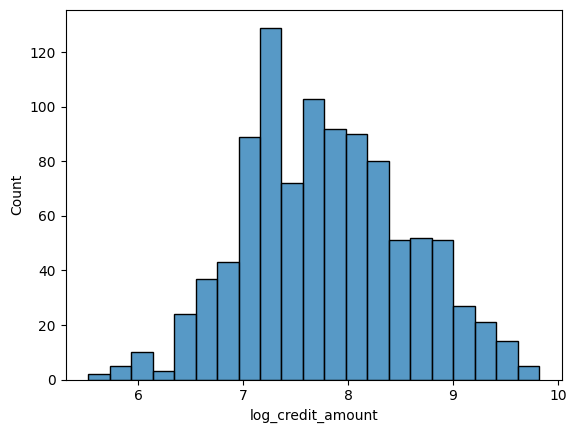

In [10]:
for i in float_variables:
  sns.histplot(x = df[i])
  plt.show()

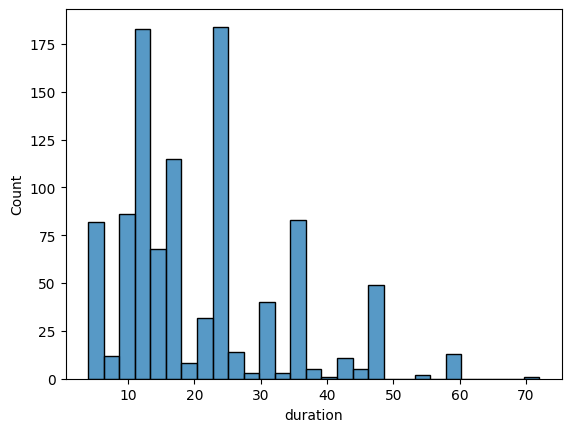

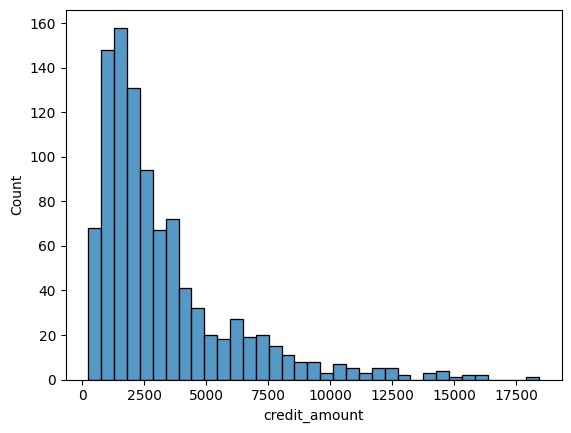

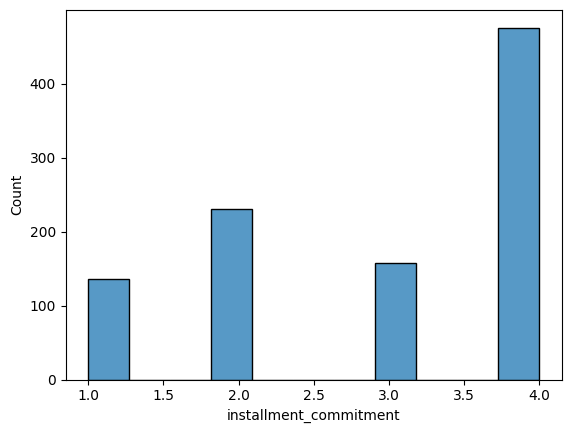

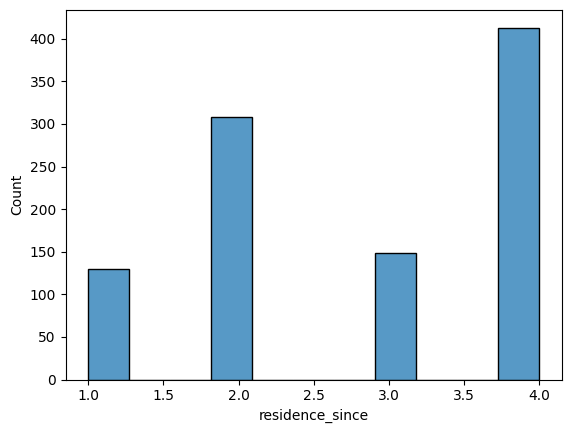

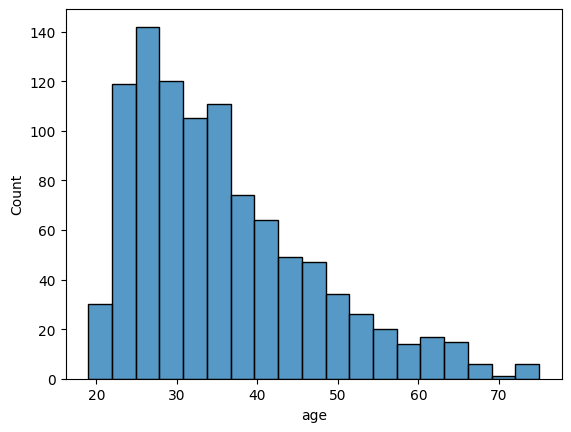

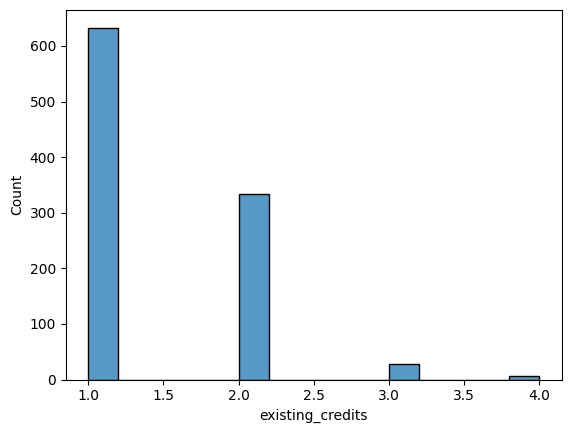

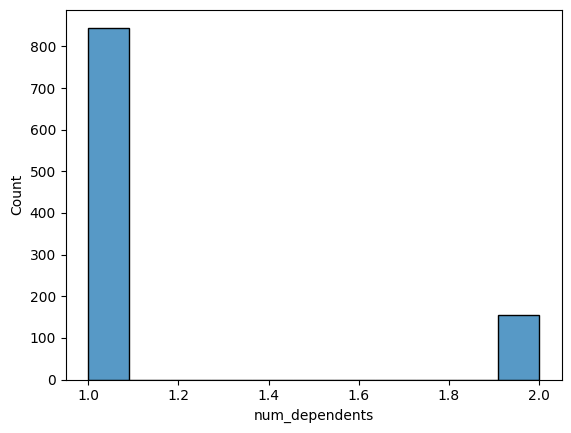

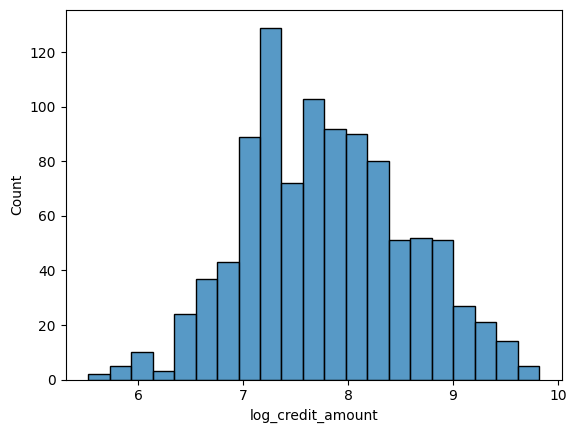

In [11]:
for i in int_variables:
  sns.histplot(x = df[i])
  plt.show()

<Axes: >

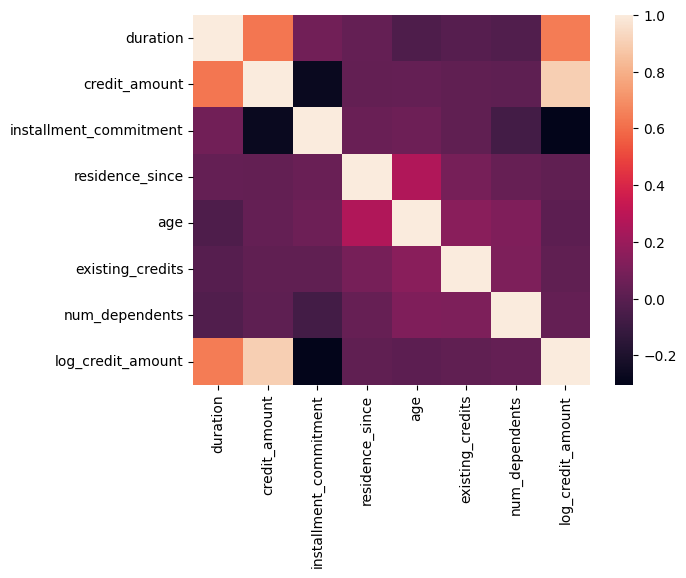

In [12]:
# sns.heatmap(df[int_variables].corr())
sns.heatmap(df[int_variables].corr())

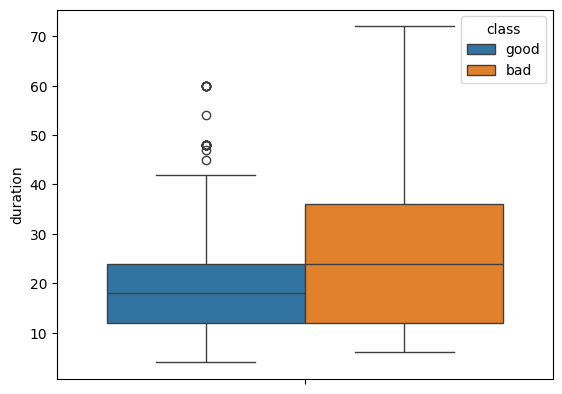

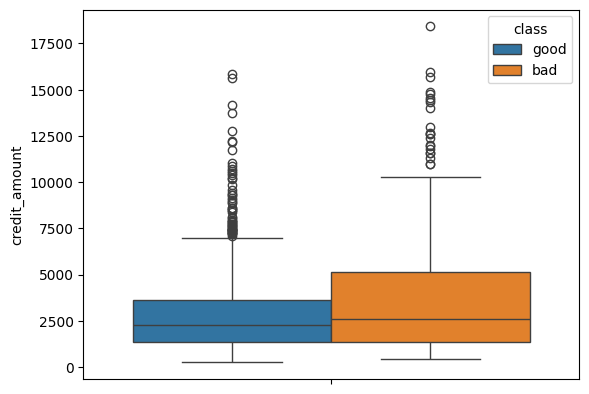

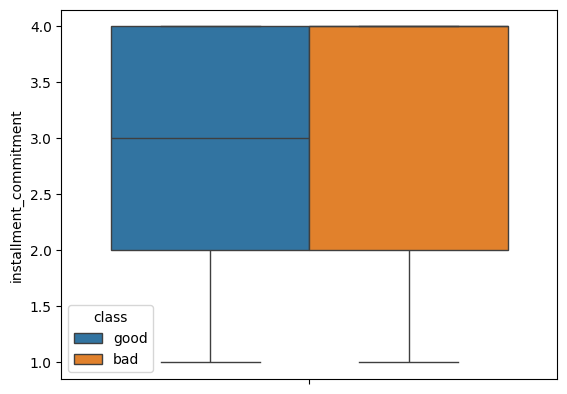

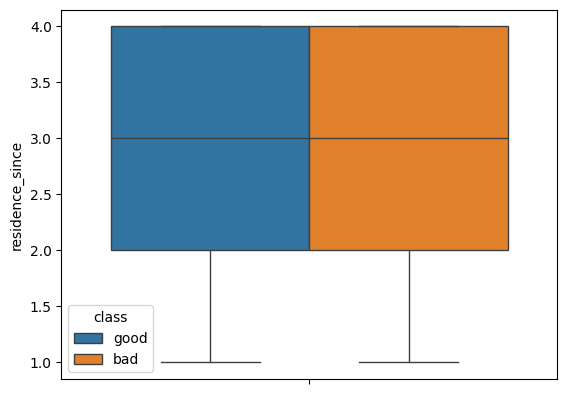

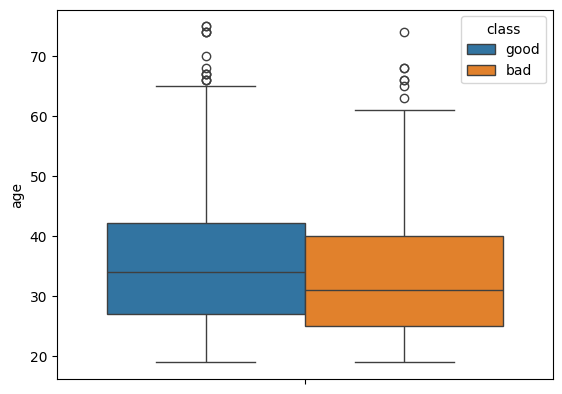

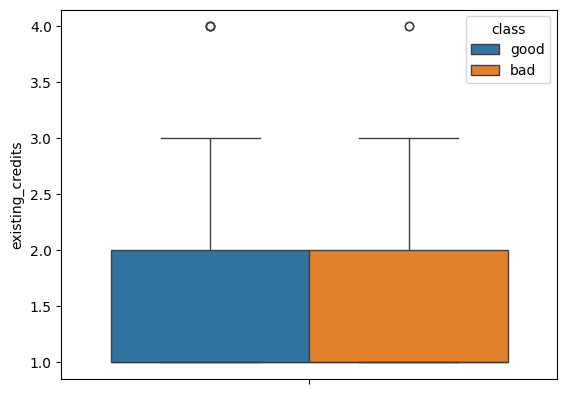

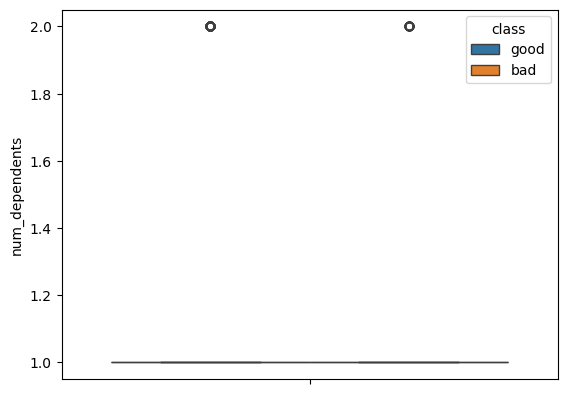

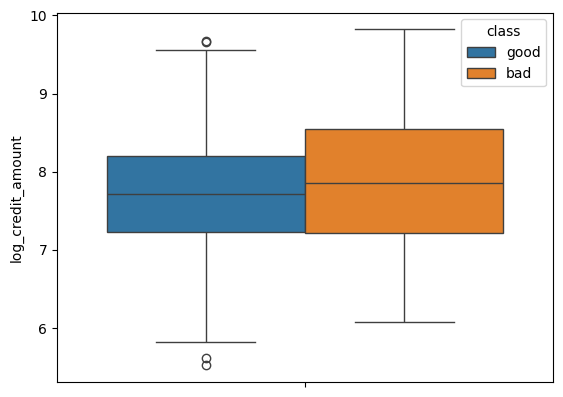

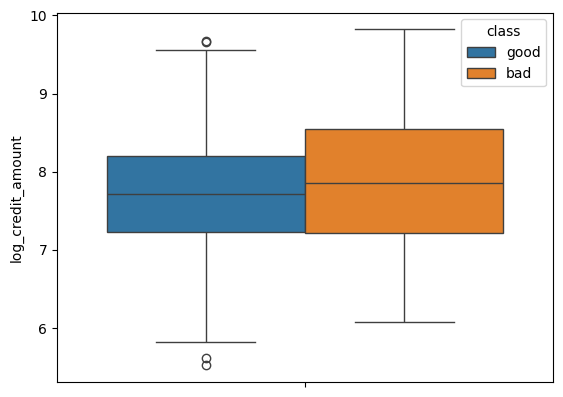

In [13]:
for i in int_variables + ['log_credit_amount']:

  sns.boxplot(y = df[i], hue = df['class'])
  plt.show()

<Axes: xlabel='age', ylabel='Count'>

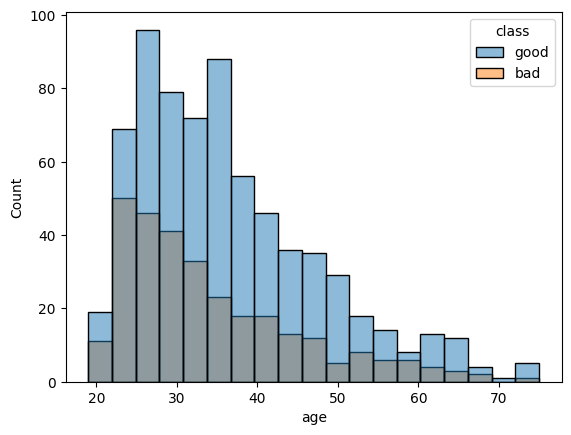

In [14]:
sns.histplot(x = df.age, hue = df['class'])

<Axes: xlabel='credit_amount', ylabel='Count'>

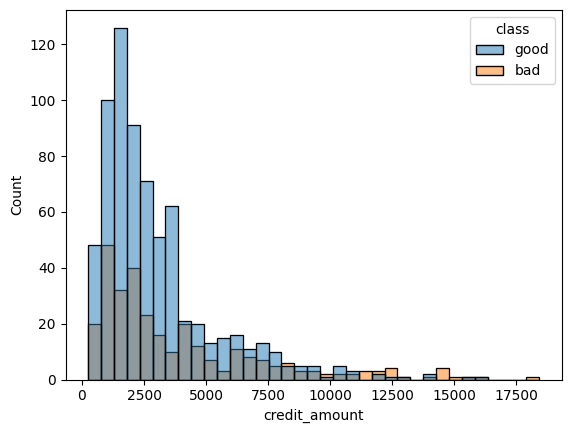

In [15]:
sns.histplot(x = df.credit_amount, hue = df['class'])

In [16]:
df.groupby(['class']).median()

<ipython-input-16-2af47973bd73>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['class']).median()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,log_credit_amount
class,,,,,,,,
bad,24.0,2574.5,4.0,3.0,31.0,1.0,1.0,7.853409
good,18.0,2244.0,3.0,3.0,34.0,1.0,1.0,7.716014


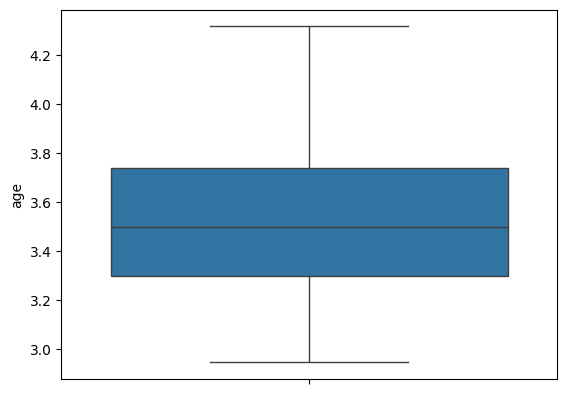

In [17]:
sns.boxplot(np.log(df.age))
plt.show()

In [18]:
cat_variables

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [19]:
cat_variables.remove('class')
cat_variables.remove('foreign_worker')

In [20]:
len(cat_variables)

12

In [21]:
for i in df[cat_variables]:
  print(df[i].value_counts())

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               59
other                   46
Name: purpose, dtype: int64
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64
male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: personal_status, dtype: int64
none            907
guarantor 

In [22]:
mean_age = df.age.mean()
sd_age = df.age.std()

(mean_age, sd_age)

(35.546, 11.375468574317512)

In [23]:
mean_age + (3*sd_age)

69.67240572295253

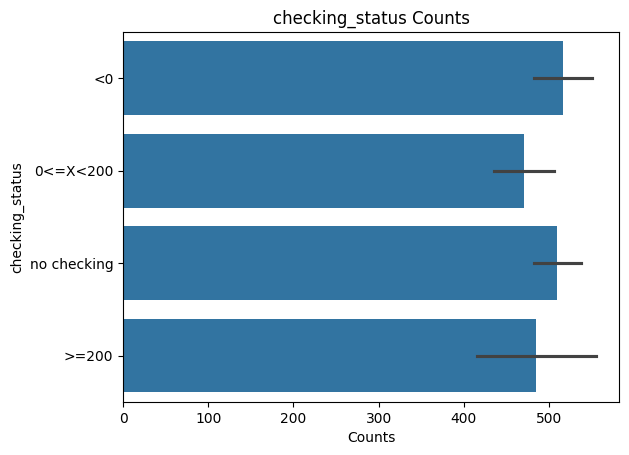

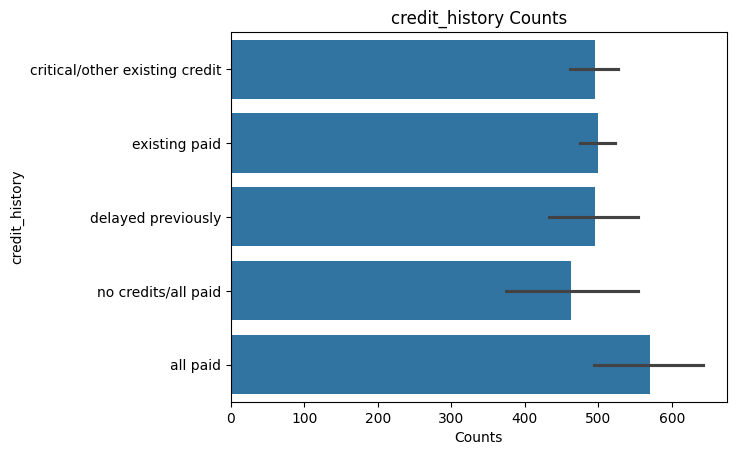

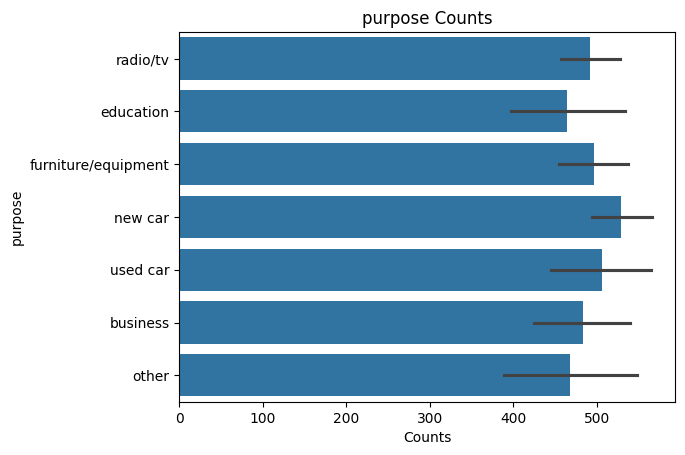

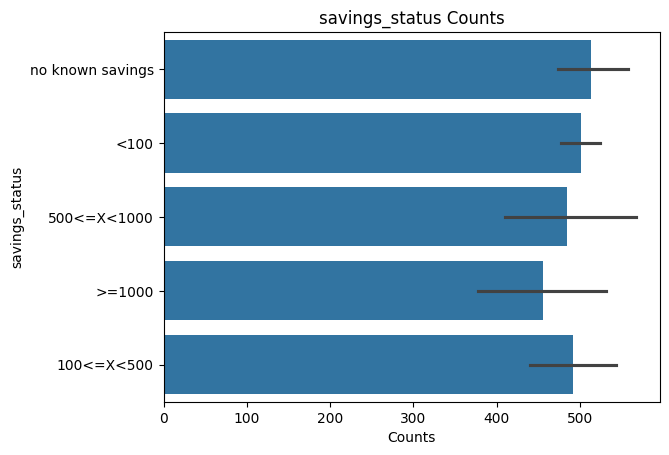

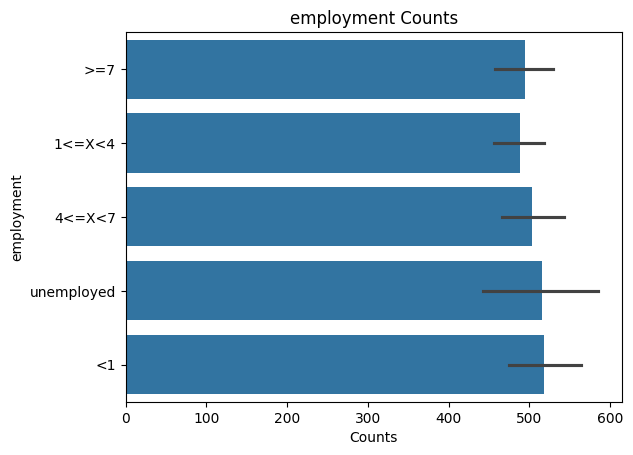

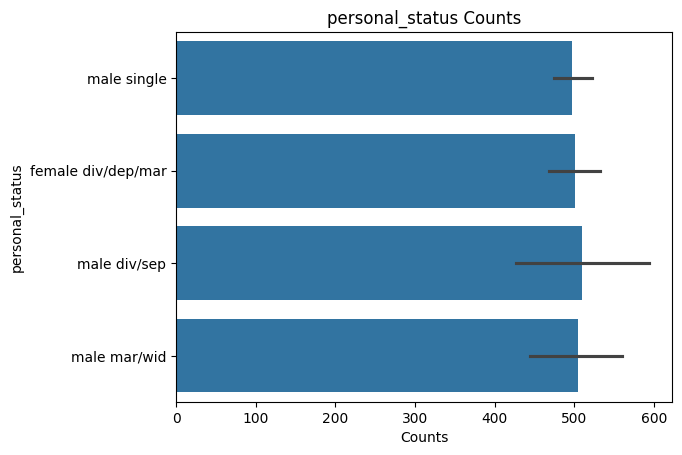

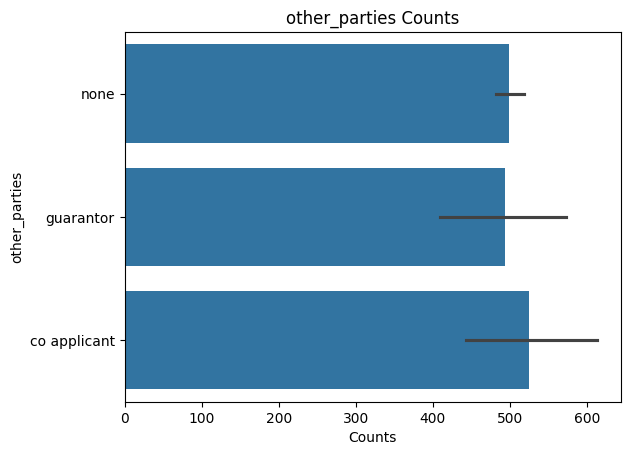

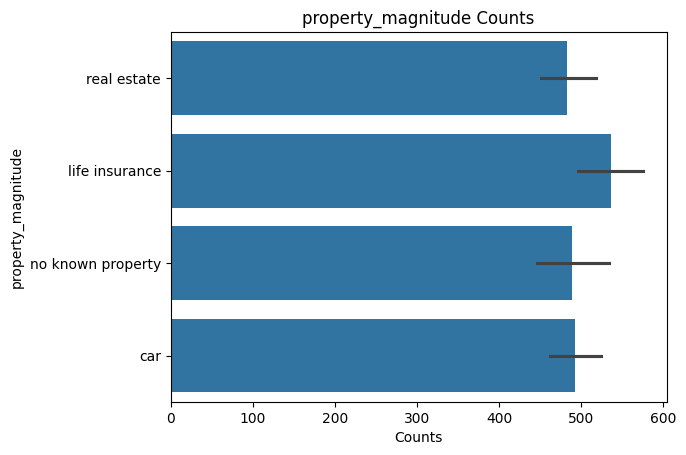

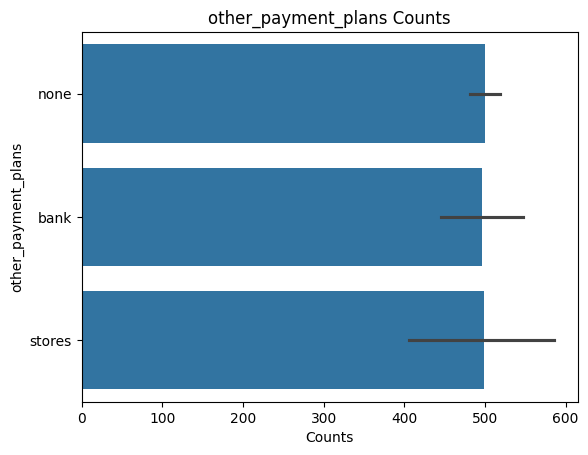

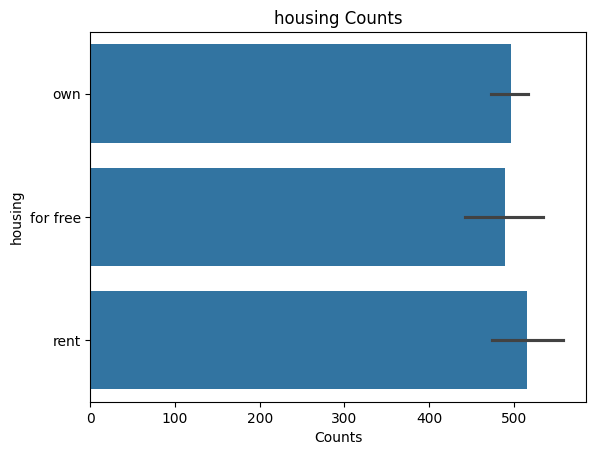

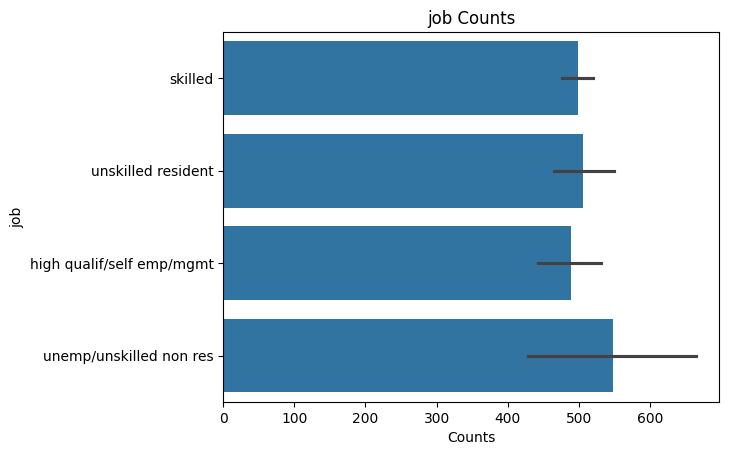

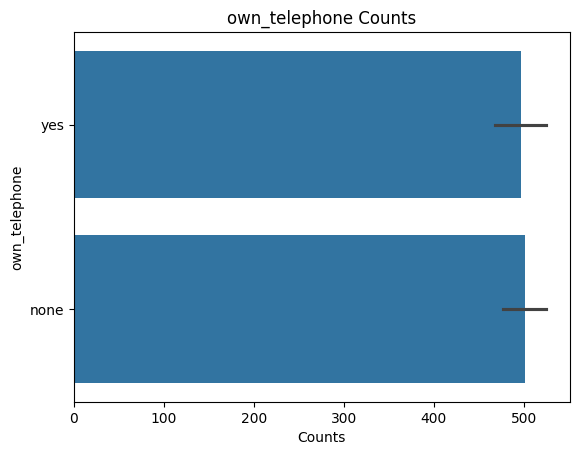

In [24]:
# for i in cat_variables:
#   sns.barplot(x = df[i], hue = df['class'])
#   plt.show()


for i in cat_variables:
  sns.barplot(df[i])
  plt.title(f'{i} Counts')
  plt.xlabel('Counts')
  plt.show()

In [25]:
for i in cat_variables:
  number_of_levels = len(df[i].unique())
  print(f'{i} variable has {number_of_levels} levels')

checking_status variable has 4 levels
credit_history variable has 5 levels
purpose variable has 7 levels
savings_status variable has 5 levels
employment variable has 5 levels
personal_status variable has 4 levels
other_parties variable has 3 levels
property_magnitude variable has 4 levels
other_payment_plans variable has 3 levels
housing variable has 3 levels
job variable has 4 levels
own_telephone variable has 2 levels


In [26]:
ordinal_variables = ['checking_status','employment','savings_status']

for i in ordinal_variables:
  print(df[i].value_counts())

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64


In [27]:
# Label Mapping

checking_mapping = {
                    'no checking':0,
                    '<0':1,
                    '0<=X<200':2,
                    '>=200':3
                    }
employment_mapping = {
                      'unemployed':0,
                      '<1':1,
                      '1<=X<4':2,
                      '4<=X<7':3,
                      '>=7':4
                      }
savings_mapping = {
                  'no known savings': 0,
                  '<100':1,
                  '100<=X<500':2,
                  '500<=X<1000':3,
                  '>=1000':4
                  }

In [28]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

df['checking_status'] = df['checking_status'].replace(checking_mapping)
df['employment'] = df['employment'].replace(employment_mapping)
df['savings_status'] = df['savings_status'].replace(savings_mapping)

In [29]:
ordinal_variables = ['checking_status','employment','savings_status']

for i in ordinal_variables:
  print(df[i].value_counts())

0    394
1    274
2    269
3     63
Name: checking_status, dtype: int64
2    339
4    253
3    174
1    172
0     62
Name: employment, dtype: int64
1    603
0    183
2    103
3     63
4     48
Name: savings_status, dtype: int64


In [30]:
# dropping class and foreign worker and moving Class Data to another variable

Y_Target = df['class']

df.drop(['class', 'foreign_worker'], axis = 1, inplace = True)

In [31]:
nominal_variables = []

for i in cat_variables:
  if i not in ordinal_variables:
    nominal_variables.append(i)

In [32]:
nominal_variables

['credit_history',
 'purpose',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone']

In [33]:
df[nominal_variables]

,credit_history,purpose,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone
0,critical/other existing credit,radio/tv,male single,none,real estate,none,own,skilled,yes
1,existing paid,radio/tv,female div/dep/mar,none,real estate,none,own,skilled,none
2,critical/other existing credit,education,male single,none,real estate,none,own,unskilled resident,none
3,existing paid,furniture/equipment,male single,guarantor,life insurance,none,for free,skilled,none
4,delayed previously,new car,male single,none,no known property,none,for free,skilled,none
...,...,...,...,...,...,...,...,...,...
995,existing paid,furniture/equipment,female div/dep/mar,none,real estate,none,own,unskilled resident,none
996,existing paid,used car,male div/sep,none,life insurance,none,own,high qualif/self emp/mgmt,yes
997,existing paid,radio/tv,male single,none,car,none,own,skilled,none
998,existing paid,radio/tv,male single,none,no known property,none,for free,skilled,yes


In [34]:
nominal_df = pd.get_dummies(df[nominal_variables])

In [35]:
# Dropping old nominal variables

df.drop(nominal_variables, axis = 1, inplace = True)

In [36]:
df['log_age'] = np.log(df['age'])

In [37]:
# Dropping old log variables

log_variables = ['credit_amount','age']

df.drop(log_variables, axis =1, inplace = True)

In [38]:
df.shape

(1000, 10)

In [39]:
nominal_df.shape

(1000, 35)

In [40]:
final_df = pd.concat([df,nominal_df], axis = 1)

In [41]:
final_df

,checking_status,duration,savings_status,employment,installment_commitment,residence_since,existing_credits,num_dependents,log_credit_amount,log_age,...,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes
0,1,6,0,4,4,4,2,1,7.063904,4.204693,...,0,0,1,0,0,1,0,0,0,1
1,2,48,1,2,2,2,1,1,8.691315,3.091042,...,0,0,1,0,0,1,0,0,1,0
2,0,12,1,3,2,3,1,2,7.647786,3.891820,...,0,0,1,0,0,0,0,1,1,0
3,1,42,1,3,2,4,1,2,8.972337,3.806662,...,0,1,0,0,0,1,0,0,1,0
4,1,24,1,2,3,4,2,2,8.490849,3.970292,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,1,3,3,4,1,1,7.459339,3.433987,...,0,0,1,0,0,0,0,1,1,0
996,1,30,1,2,4,4,1,1,8.257645,3.688879,...,0,0,1,0,1,0,0,0,0,1
997,0,12,1,4,4,4,1,1,6.689599,3.637586,...,0,0,1,0,0,1,0,0,1,0
998,1,45,1,2,4,4,1,1,7.520235,3.135494,...,0,1,0,0,0,1,0,0,0,1


In [42]:
# Scaling data uing MinMax Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(final_df)
scaled_df = pd.DataFrame(scaled_data, columns=final_df.columns)

# Clustering Begins


In [43]:
# Now for k-means clustering

from sklearn.cluster import KMeans

def optimise_k_means(data, max_k):
  '''
  The purpose of this funciton is to optimize the clustering selection for our kmeans algorithm.

  '''

  clusters = []
  inertias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(data)

    clusters.append(k)
    inertias.append(kmeans.inertia_)

  #Generate the elbow plot
  # fig = plt.subplots(figszie(10,5))
  plt.plot(clusters,inertias, 'o-')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.title('Scree Plot: Number of Clusters vs Intertia')
  # plt.grid (True)

  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

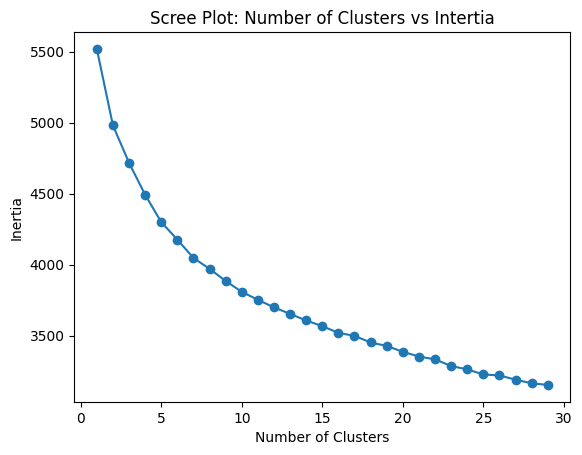

In [44]:
optimise_k_means(scaled_data, 30)

In [45]:
from sklearn.metrics import silhouette_score


def optimize_k_means_sl(data, max_k):

    clusters = []
    silhouette_scores = []

    for k in range(2, max_k+1):  # Starting from 2 clusters for silhouette score
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, kmeans_labels)

        clusters.append(k)
        silhouette_scores.append(silhouette_avg)

    # Generate the silhouette score plot
    plt.plot(clusters, silhouette_scores, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Plot: Number of Clusters vs Silhouette Score')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

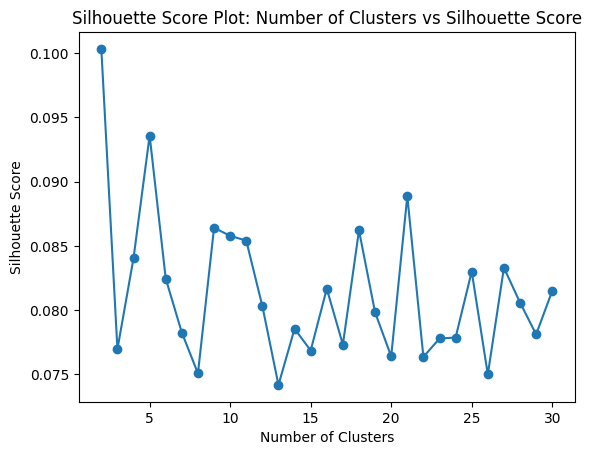

In [46]:
optimize_k_means_sl(scaled_data,30)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


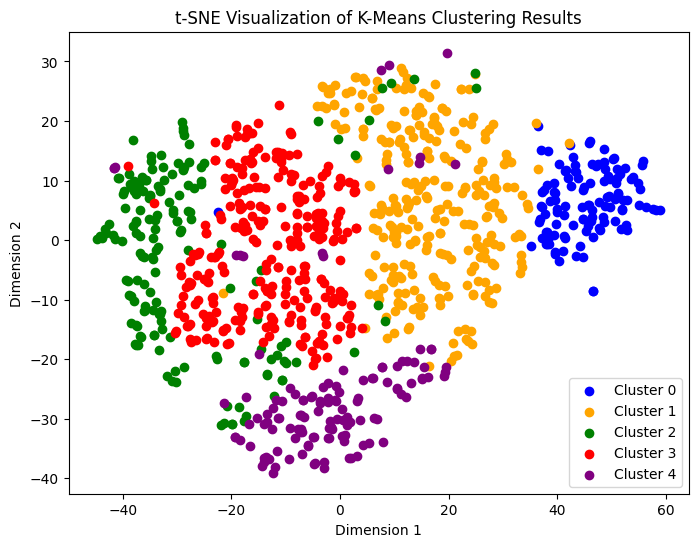

In [47]:
from sklearn.manifold import TSNE

kmeans = KMeans(5, random_state = 42)
kmeans.fit(scaled_data)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['K-Means Cluster'] = kmeans.labels_

# Visualize the results
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green', 'red','purple']

for cluster, color in zip(range(5), colors):
    cluster_points = tsne_df[tsne_df['K-Means Cluster'] == cluster]
    plt.scatter(cluster_points['Dimension 1'], cluster_points['Dimension 2'], c=color, label=f'Cluster {cluster}')

plt.title('t-SNE Visualization of K-Means Clustering Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [48]:
df

,checking_status,duration,savings_status,employment,installment_commitment,residence_since,existing_credits,num_dependents,log_credit_amount,log_age
0,1,6,0,4,4,4,2,1,7.063904,4.204693
1,2,48,1,2,2,2,1,1,8.691315,3.091042
2,0,12,1,3,2,3,1,2,7.647786,3.891820
3,1,42,1,3,2,4,1,2,8.972337,3.806662
4,1,24,1,2,3,4,2,2,8.490849,3.970292
...,...,...,...,...,...,...,...,...,...,...
995,0,12,1,3,3,4,1,1,7.459339,3.433987
996,1,30,1,2,4,4,1,1,8.257645,3.688879
997,0,12,1,4,4,4,1,1,6.689599,3.637586
998,1,45,1,2,4,4,1,1,7.520235,3.135494


In [49]:
# final_df['labels'].value_counts()

In [50]:
file_path = '/content/drive/MyDrive/postCapitalTwo.csv'
original_df = pd.read_csv(file_path)
original_df.head(3).T

# original_df['age'] = np.log(original_df['age'])
# original_df['credit_amount'] = np.log(original_df['age'])

original_df['labels'] = kmeans.labels_

In [51]:
original_df.groupby(['labels']).median()

<ipython-input-51-79ddfb749d47>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  original_df.groupby(['labels']).median()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,log_credit_amount
labels,,,,,,,,
0,24.0,3844.0,4.0,4.0,42.0,1.0,1.0,8.254269
1,24.0,2872.0,3.0,3.0,35.0,1.0,1.0,7.962764
2,12.0,1527.0,3.0,2.0,37.0,1.0,1.0,7.331053
3,18.0,2160.5,4.0,2.0,30.0,1.0,1.0,7.678083
4,18.0,2139.0,2.0,4.0,25.0,1.0,1.0,7.668088


In [52]:
original_df.groupby('labels')['class'].agg(lambda x: x.mode()[0])

labels
0    good
1    good
2    good
3    good
4    good
Name: class, dtype: object

In [53]:
original_df['log_age'] = np.log(original_df['age'])

In [54]:
original_df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [80]:
# original_df.to_csv('/content/drive/MyDrive/encoded.csv', index=False)